In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

with open('logjams2012_test_types_python.csv', newline='') as f:
    data = [row for row in csv.DictReader(f)] #read excel into a dictionary
with open('logjams2014_testtypes.csv', newline='') as f:
    data2 = [row for row in csv.DictReader(f)] #read excel into a dictionary
    
for x in data:
    x['rkm']  = float(x['rkm'])
    x['size'] = float(x['size'])
for x in data2:
    x['rkm']  = float(x['rkm'])
    x['size'] = float(x['size'])

In [3]:
#unique_types = list(set([x['type'] for x in data1])) 
#unique_types = ['Bar Apex', 'Stumps', 'Key Pieces', 'Meander', 'Channel Spanning','Boulders', 'Live Trees']
unique_types = ['Stumps', 'Meander', 'Channel Spanning', 'Bar Apex', 'Fencing', 
                'Key Pieces', 'Boulders', 'Drift/Bar Top', 'Live Trees',
                'Bridge Pier']
print('unique types are:',unique_types)

unique types are: ['Stumps', 'Meander', 'Channel Spanning', 'Bar Apex', 'Fencing', 'Key Pieces', 'Boulders', 'Drift/Bar Top', 'Live Trees', 'Bridge Pier']


In [4]:
# filters all logjam sizes between start and end for a given lj type
def rkm_filter(ljtype, start, end, datar):
    return [x for x in datar if start<=x['rkm'] and x['rkm'] < end
             and x['type'] == ljtype]
d = rkm_filter('Bar Apex', 0, 25,data)
# output is a list of dictionaries    

In [5]:
df = pd.DataFrame({ 'type' : ['t'], 
                   '#2012' : [0],
                   '#2014' : [0] })
for t in unique_types:
    dfadd = pd.DataFrame({ 'type' : [t],
                          '#2012' : [len(rkm_filter(t, 0, 25, data))],
                          '#2014' : [len(rkm_filter(t, 0, 25, data2))] })
    df = df.append(dfadd)
df =df.sort_values(by='#2012', ascending = False)
df =df[0:len(unique_types)]
#print(df)
ljs = df.values[:,2]
num2012 = df.values[:,0]
num2014 = df.values[:,1]
print(ljs, num2012,num2014)

['Bar Apex' 'Stumps' 'Meander' 'Key Pieces' 'Channel Spanning' 'Live Trees'
 'Fencing' 'Boulders' 'Drift/Bar Top' 'Bridge Pier'] [34 16 8 8 7 4 2 2 2 1] [49 35 15 10 13 11 1 8 14 0]


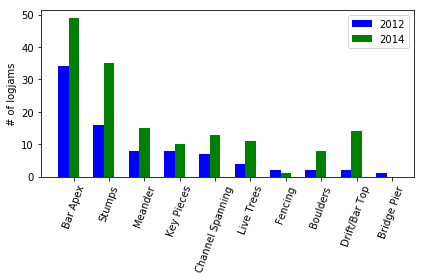

In [17]:
y_pos = np.arange(len(ljs))
bar_width = .3
Santa = ['2012']
rects1 = plt.bar(y_pos, num2012, bar_width, color='b', label=Santa[0])
rects2 = plt.bar(y_pos + bar_width, num2014, bar_width, color='g', label='2014')

plt.xticks(y_pos + bar_width, ljs, rotation = 70)
plt.legend()
plt.ylabel('# of logjams')
plt.tight_layout()
plt.show()

In [7]:
#gets all the sizes of each lj of a particular type
def alljamsforboxplot(type,datas):
    m = rkm_filter(type, 0, 25, datas)
    b = []
    for x in m:
        b.append(x['size'])
    return b
print(alljamsforboxplot('Meander',data))

[135.0, 248.0, 360.0, 300.0, 174.0, 340.0, 1000.0, 384.0]


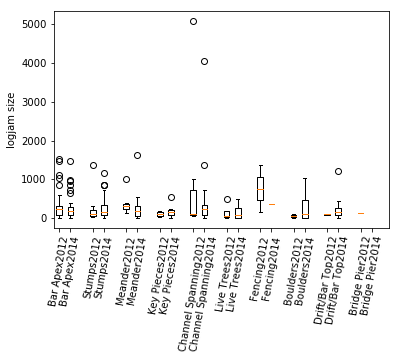

In [8]:
#test = ['Meander','Fencing']
bx = []
blabels = []
for b in ljs:
    zz = []
    bx.append(alljamsforboxplot(b,data))
    bx.append(alljamsforboxplot(b,data2))
    blabels.append(b + '2012')
    blabels.append(b + '2014')
    bx.append(zz)

plt.boxplot(bx)
plt.xticks([1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29],blabels, rotation = 80)
plt.ylabel('logjam size')
#plt.ylim(0,1800)
plt.show()




In [9]:
a = [1,3,5,6,6,7]
print(np.median(a))
a.append(10)
print(a)

5.5
[1, 3, 5, 6, 6, 7, 10]


[231.0, 108.0, 320.0, 102.0, 96.0, 57.5, 766.0, 55.0, 97.0] [180.0, 150.0, 196.0, 164.0, 234.0, 70.0, 370.0, 120.0, 150.0]


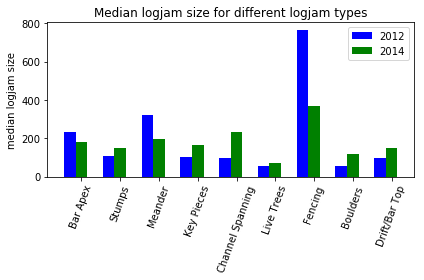

In [10]:
medianlj = ['Bar Apex', 'Stumps', 'Meander', 'Key Pieces', 'Channel Spanning', 'Live Trees',
 'Fencing', 'Boulders', 'Drift/Bar Top']
m2012 = []
m2014 = []
for b in medianlj:
    m2012.append(np.median(alljamsforboxplot(b,data)))
    m2014.append(np.median(alljamsforboxplot(b,data2)))

print(m2012, m2014)

y_pos = np.arange(len(medianlj))
bar_width = .3

rects1 = plt.bar(y_pos, m2012, bar_width, color='b', label='2012')
rects2 = plt.bar(y_pos + bar_width, m2014, bar_width, color='g', label='2014')

plt.xticks(y_pos + bar_width, medianlj, rotation = 70)
plt.legend()
plt.title('Median logjam size for different logjam types')
plt.ylabel('median logjam size')
plt.tight_layout()
plt.show()

[11596.0, 3298.0, 2941.0, 845.0, 6849.0, 633.0, 1532.0, 110.0, 194.0] [12636.0, 9687.0, 4398.0, 1734.0, 7564.0, 1676.0, 370.0, 2531.0, 3304.0]


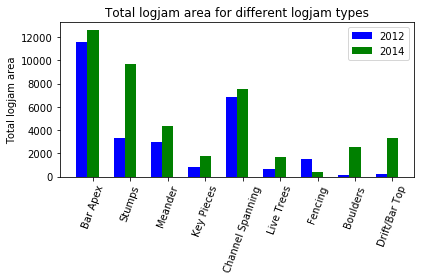

In [11]:
sumlj = ['Bar Apex', 'Stumps', 'Meander', 'Key Pieces', 'Channel Spanning', 'Live Trees',
 'Fencing', 'Boulders', 'Drift/Bar Top']
s2012 = []
s2014 = []
for b in sumlj:
    s2012.append(sum(alljamsforboxplot(b,data)))
    s2014.append(sum(alljamsforboxplot(b,data2)))

print(s2012, s2014)

y_pos = np.arange(len(medianlj))
bar_width = .3

rects1 = plt.bar(y_pos, s2012, bar_width, color='b', label='2012')
rects2 = plt.bar(y_pos + bar_width, s2014, bar_width, color='g', label='2014')

plt.xticks(y_pos + bar_width, sumlj, rotation = 70)
plt.legend()
plt.title('Total logjam area for different logjam types')
plt.ylabel('Total logjam area')
plt.tight_layout()
plt.show()